In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"D:\project\chat_bot\data\raw\Fraud.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
# Missing values
print(df.isnull().sum())

# Thống kê cơ bản
df.describe(include='all')


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1677795071,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


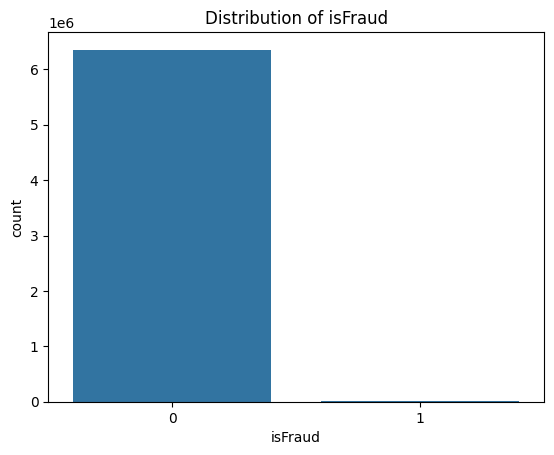

Tỉ lệ fraud trong sample: 0.1291%


In [3]:
sns.countplot(x='isFraud', data=df)
plt.title("Distribution of isFraud")
plt.show()

fraud_rate = df['isFraud'].mean()*100
print(f"Tỉ lệ fraud trong sample: {fraud_rate:.4f}%")


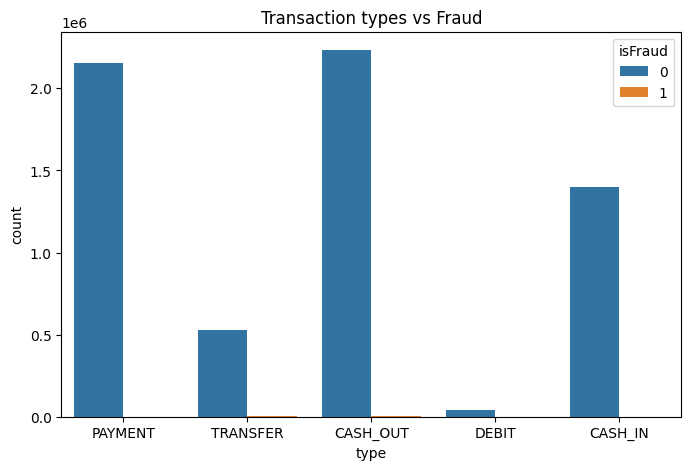

type
CASH_IN     0.000000
CASH_OUT    0.001840
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007688
Name: isFraud, dtype: float64


In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, hue='isFraud')
plt.title("Transaction types vs Fraud")
plt.show()

print(df.groupby('type')['isFraud'].mean())


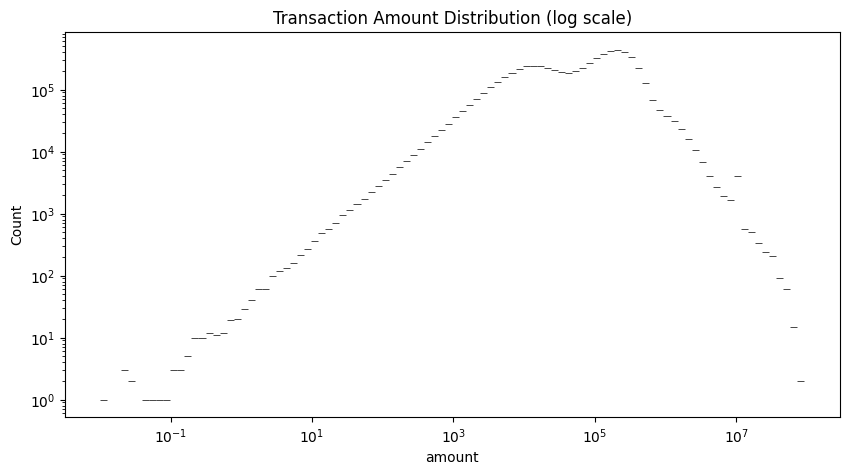

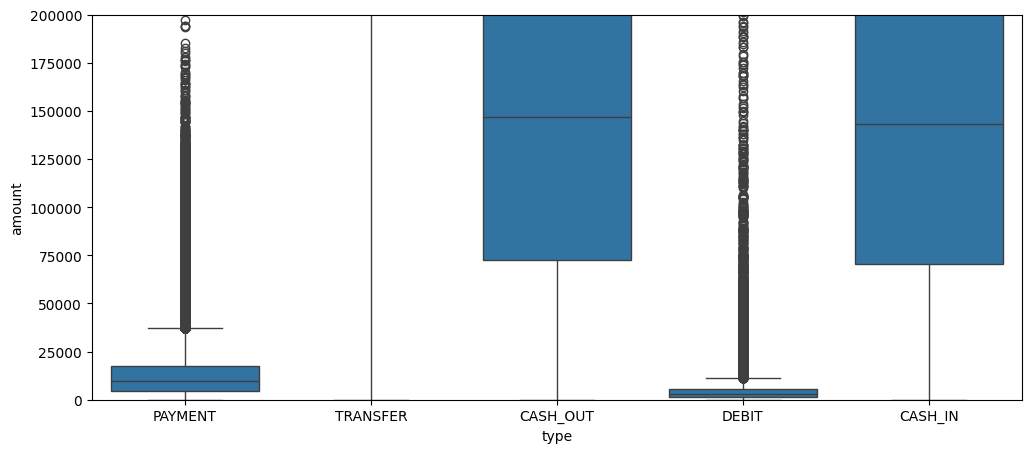

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], bins=100, log_scale=(True, True))
plt.title("Transaction Amount Distribution (log scale)")
plt.show()

# Boxplot theo loại
plt.figure(figsize=(12,5))
sns.boxplot(x='type', y='amount', data=df)
plt.ylim(0, 200000)  # cắt để dễ nhìn
plt.show()


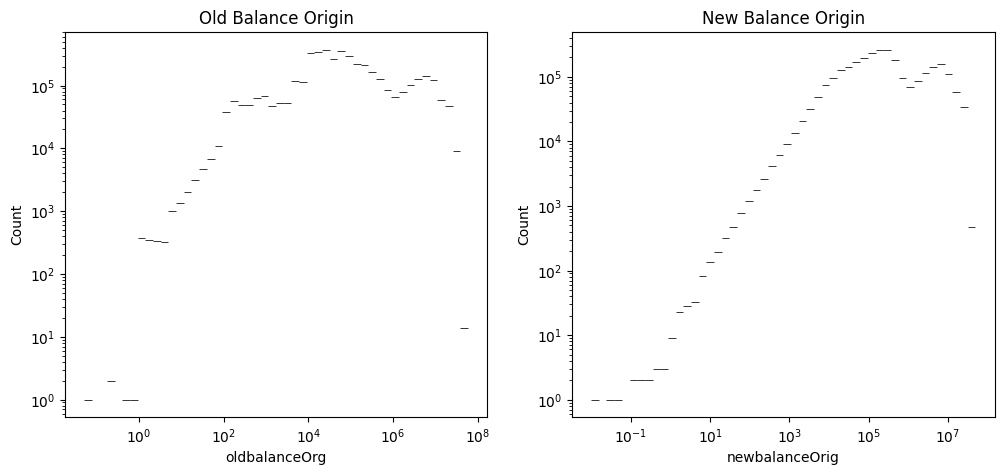

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['oldbalanceOrg'], bins=50, ax=axes[0], log_scale=(True, True))
axes[0].set_title("Old Balance Origin")

sns.histplot(df['newbalanceOrig'], bins=50, ax=axes[1], log_scale=(True, True))
axes[1].set_title("New Balance Origin")

plt.show()


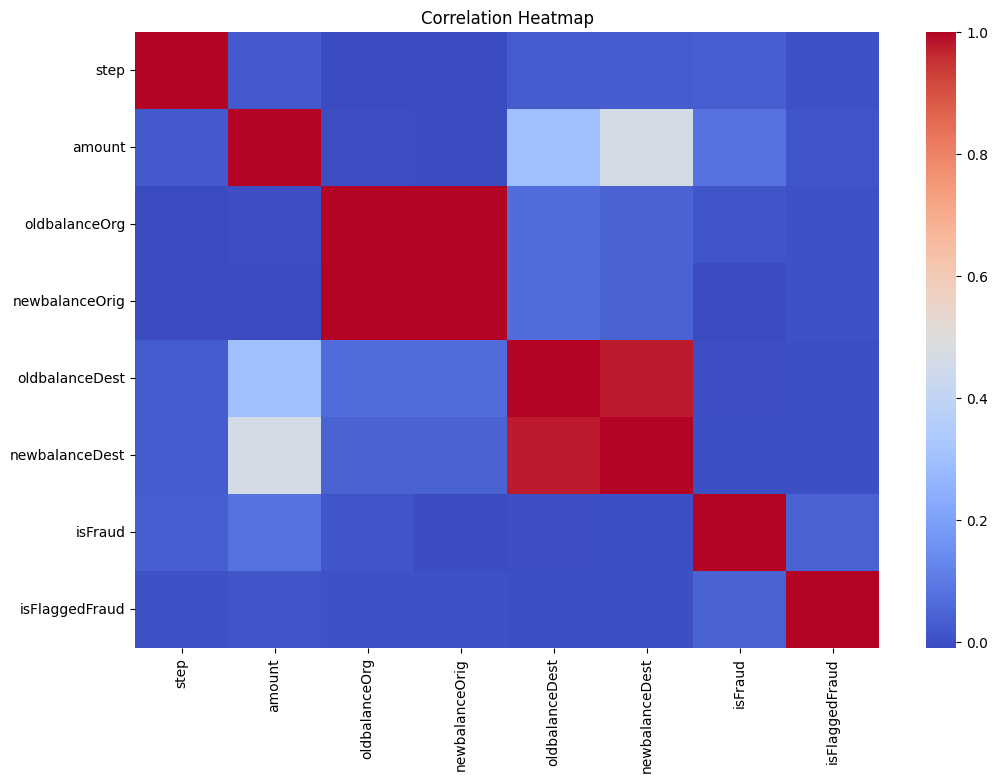

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [7]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Xem tương quan với isFraud
corr['isFraud'].sort_values(ascending=False)


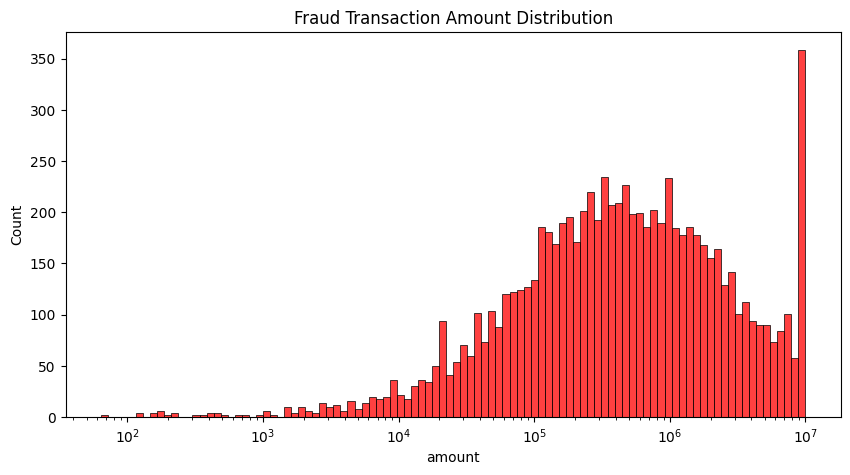

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['isFraud']==1]['amount'], bins=100, log_scale=True, color='red')
plt.title("Fraud Transaction Amount Distribution")
plt.show()


<Axes: title={'center': 'Fraud Count by Transaction Type'}, xlabel='type'>

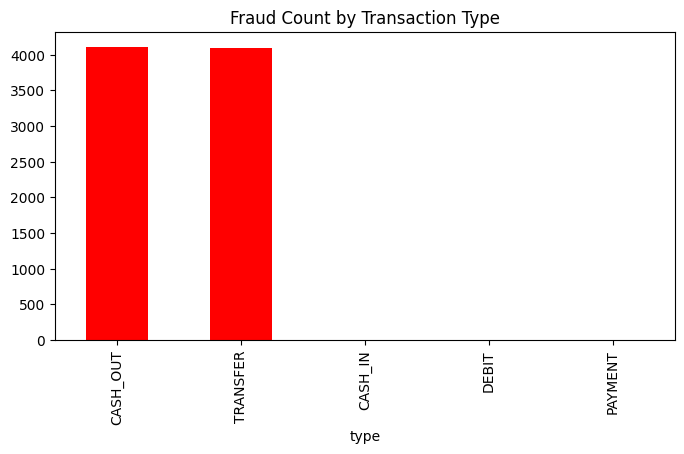

In [9]:
fraud_by_type = df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', figsize=(8,4), color='red', title="Fraud Count by Transaction Type")
